In [39]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [53]:
classifier = Sequential()

In [54]:
classifier.add(Conv2D(32, (5, 5), input_shape = (200, 200, 3), activation = 'relu'))

In [55]:
classifier.add(Conv2D(32, (5, 5)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(64, (3, 3), padding='same'))
classifier.add(Activation('relu'))
classifier.add(Conv2D(64, (3, 3)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Flatten())
classifier.add(Dense(512))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(27))
classifier.add(Activation('softmax'))

# TODO: change sigmoid to softmax and increase the number of classes that the Dense layer has (25)

# initiate RMSprop optimizer
opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)

In [59]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('train_data',
    target_size = (200, 200),
    batch_size = 64,
    class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('test_data',
    target_size = (200, 200),
    batch_size = 64,
    class_mode = 'categorical')

Found 31921 images belonging to 27 classes.
Found 8001 images belonging to 27 classes.


In [60]:
classifier.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
classifier.fit_generator(training_set,
epochs = 5,
validation_data = test_set)

Epoch 1/5
499/499 [==============================] - 1034s 2s/step - loss: 2.7411 - acc: 0.1953 - val_loss: 1.8472 - val_acc: 0.5031
Epoch 2/5
499/499 [==============================] - 1035s 2s/step - loss: 1.7374 - acc: 0.4590 - val_loss: 1.0782 - val_acc: 0.6953
Epoch 3/5
499/499 [==============================] - 1036s 2s/step - loss: 1.2420 - acc: 0.6016 - val_loss: 0.7777 - val_acc: 0.7808
Epoch 4/5
499/499 [==============================] - 1036s 2s/step - loss: 0.9582 - acc: 0.6855 - val_loss: 0.5629 - val_acc: 0.8510
Epoch 5/5
499/499 [==============================] - 1035s 2s/step - loss: 0.7836 - acc: 0.7387 - val_loss: 0.4750 - val_acc: 0.8713


In [62]:
classifier.evaluate_generator(test_set)

[0.4749514543413073, 0.8712660917385326]

In [138]:
import numpy as np
import heapq
from keras.preprocessing import image
alphabet = [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
test_image = image.load_img('test/predict/f.jpg', target_size = (200, 200))
test_image = (image.img_to_array(test_image)) / 255.
#print(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict(test_image)
print(result)
test = np.array([1, 2, 3, 4])
indices = (-result[0]).argsort()[:5]
# TODO: doing argmax on the result to find which letter it corresponds to
result_index = np.argmax(result)
print(result_index)
print(alphabet[result_index])

print("top 5 guesses:\n")
print([alphabet[i] for i in indices])
# print(result[0][0])
# if result[0][0] < 0.5:
#     prediction = 'A'
# else:
#     prediction = 'B'
    
# print(prediction)

[[8.2188309e-09 2.4251739e-07 5.8052290e-02 4.1428430e-06 2.2146060e-05
  2.3974846e-05 6.8038858e-02 1.4258231e-04 2.3402242e-06 3.4888688e-02
  6.8504960e-05 1.7793480e-02 3.3199614e-01 2.9824046e-02 9.6029759e-04
  3.8053616e-04 5.2238436e-05 4.0983246e-06 1.8398877e-02 6.5525928e-05
  4.0660626e-03 1.5090986e-01 2.1512110e-02 2.4057303e-01 2.2148436e-02
  1.9095976e-05 5.2343563e-05]]
12
L
top 5 guesses:

['L', 'W', 'U', 'F', 'B']


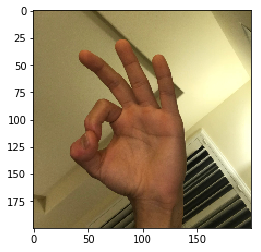

In [115]:

im = test_image
import matplotlib.pyplot as plt
plt.imshow(im[0])

In [27]:
plt.show()